# PS1Ex4 - Discrete Choice

I will once again modify my code from Exercise 2 to fit the discrete-choice problem, following Jason's methods.

By the way, credit to Albi and Tim for basically writing the code for this and number 3... 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Set Parameter Values

Parameters:
$$ 
\beta = \text{ Rate of time preference} \\
b = \text{ Unemployment benefits} \\
\mu = {Mean of log wages} \\
\sigma = {Standard deviation of wage draws
$$

In [12]:
# Declare Parameters
# Preference parameters
beta = 0.96
b = 0.05
# Taste shock parameters: AR(1) process:
mu = 0
sigma = .15
size_w = 50
rho = 0

In [13]:
def util(w):
    '''
    This function defines the lifetime utility that a worker will get 
    if they choose to take a job at wage w.
    '''
    u = w * ( beta / (1 - beta) )
    return u

print(util(2))

47.99999999999996


## Step 2: Create Grid for State Space

In [14]:
'''
------------------------------------------------------------------------
Create Grid for State Space
------------------------------------------------------------------------
size_w    = integer, number of grid points in state space
w_grid    = vector, size_w x 1 vector of grid points
------------------------------------------------------------------------
'''

import ar1_approx as ar1
ln_w_grid, pi_t = ar1.addacooper(size_w, mu, rho, sigma)
w_grid = np.exp(ln_w_grid)
pi = np.transpose(pi_t)

'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
U        = 1 dimensional array, lifetime PDV of wages for all possible 
           wage offers (utility if job offer is accepted)
------------------------------------------------------------------------
'''
U = np.zeros(size_w) 
for i in range(size_w): # loop over w
        U[i] = (w_grid[i])/(1-beta)

## Step 3: VFI

In [15]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol       = scalar, tolerance required for value function to converge
VFdist      = scalar, distance between last two value functions
VFmaxiter   = integer, maximum number of iterations for value function
V           = vector, the value functions at each iteration
TV          = vector, the value function after applying the Bellman operator
PF_discrete = vector, indicies of choice of take offer (=0) or wait (=1)
              for all wage offers
Vstore      = array, stores V at each iteration 
VFiter      = integer, current iteration number
U_emp       = vector, utility from taking the job now
Vun         = vector, utility from waiting/not accepting job offer
VF          = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-5 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros(size_w) # initial guess at value function
TV = np.zeros(size_w)
PF_discrete = np.zeros(size_w)
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print('This is the distance: ', VFdist, VFiter)
    for i in range(size_w): # loop over w
        EV = 0
        for ii in range(size_w):  # loop over w
            EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
        U_emp = U[i]
        Vun = b + beta * EV 
        TV[i] = max(U_emp, Vun)
        PF_discrete[i] = U_emp >= Vun  # = 1 if take job
            
    Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

This is the distance:  7.0 1
This is the distance:  35.94578546211266 2
Value function converged after this many iterations: 3


In [16]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''
threshold_w = w_grid[np.argmax(PF_discrete)]
print(threshold_w)

1.0347248144573558


<Figure size 432x288 with 0 Axes>

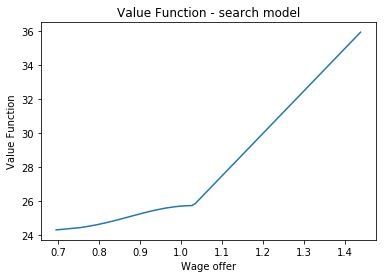

In [20]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[:], VF[:])
# Set the fontsize
plt.xlabel('Wage offer')
plt.ylabel('Value Function')
plt.title('Value Function - search model')
plt.show()

In [21]:
#Set grid of b
grid_b = np.linspace(0.05, 1, 20)
threshold_vec = np.zeros(20)

#Begin for loop
for q in range(20):

    VFtol = 1e-8 
    VFdist = 7.0 
    VFmaxiter = 500 
    V = np.zeros(size_w) # initial guess at value function
    TV = np.zeros(size_w)
    PF_discrete = np.zeros(size_w)
    Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
    VFiter = 1 
    while VFdist > VFtol and VFiter < VFmaxiter:
        print('This is the distance', VFdist, VFiter)
        for i in range(size_w): # loop over w
            EV = 0
            for ii in range(size_w):  # loop over w
                EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
            U_emp = U[i]
            Vun = grid_b[q] + beta * EV 
            TV[i] = max(U_emp, Vun)
            PF_discrete[i] = U_emp >= Vun  # = 1 if take job
            
        Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
        VFdist = (np.absolute(V - TV)).max()  # check distance
        V = TV
        VFiter += 1 

    if VFiter < VFmaxiter:
        print('Value function converged after this many iterations:', VFiter)
    else:
        print('Value function did not converge')            


    VF = V # solution to the functional equation
    threshold_vec[q]=w_grid[np.argmax(PF_discrete)]

This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 35.94578546211266 2
Value function converged after this many iterations: 3
This is the dist

In [24]:
print(threshold_vec)

[1.03472481 1.03472481 1.04279291 1.04279291 1.05104386 1.05104386
 1.05950847 1.05950847 1.05950847 1.06822176 1.06822176 1.07722417
 1.07722417 1.08656302 1.08656302 1.08656302 1.09629462 1.09629462
 1.10648704 1.10648704]


<Figure size 432x288 with 0 Axes>

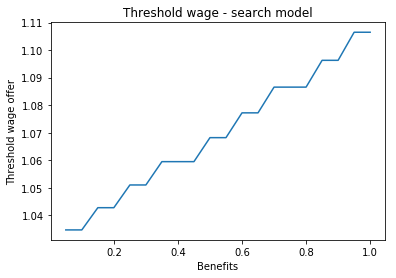

In [23]:
# Plot resevation wage as function of benefits 
plt.figure()
fig, ax = plt.subplots()
ax.plot(grid_b[:], threshold_vec[:])
plt.xlabel('Benefits')
plt.ylabel('Threshold wage offer')
plt.title('Threshold wage - search model')
plt.show()